# Loading In and Preprocessing the Data

**Importing Libraries**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage


**Loading In Data (Using the UCI Machine Learning Repository to Load in Data)**

Dataset is from Google Reviews and each row captures the average ratings each customer gave for different types of travel attractions in Europe.

In [2]:
ratings = fetch_ucirepo(id=485) 
  

data = pd.DataFrame(ratings.data.features)#Wont include userid of reviewer which isn't needed for this project

display(data.head())
display(data.tail())
data.shape

,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12
5455,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,0.96,...,0.85,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17


(5456, 24)

**Looking at Data Frame Information**

In [3]:
data.dtypes

churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoos                     float64
restaurants              float64
pubs/bars                float64
local services            object
burger/pizza shops       float64
hotels/other lodgings    float64
juice bars               float64
art galleries            float64
dance clubs              float64
swimming pools           float64
gyms                     float64
bakeries                 float64
beauty & spas            float64
cafes                    float64
view points              float64
monuments                float64
gardens                  float64
dtype: object

All values in the dataset should be floating point numbers between 0 and 5, local services is categroized as a object datatype which it could have string values, so for the clustering algorithms to work we need to convert the values into float number values.

In [4]:
#data['local services'] = data['local services'].astype(float)

#Cant use astype method to convert the local services column into float values because it raises a value error, it appears there are string values in this column

#To get around this conversion error I'm going to use the pd.to_numeric method to replace any non-number values with an NaN value
data['local services'] = pd.to_numeric(data['local services'], errors='coerce')

**Checking For Missing/NaN values in Dataset**

In [5]:
print('Amount of Missing Values For Each Feature')
data.isnull().sum() #Appears to be some missing/NaN values so we should get rid of those rows since the dataset is pretty big anyways

Amount of Missing Values For Each Feature


churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           1
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

In [6]:
data = data.dropna() #Removing any rows with a missing or NaN value
data.shape #Two rows appear to be dropped

(5454, 24)

**Looking At The Average Ratings For Each Attraction and The Distribution of Ratings**

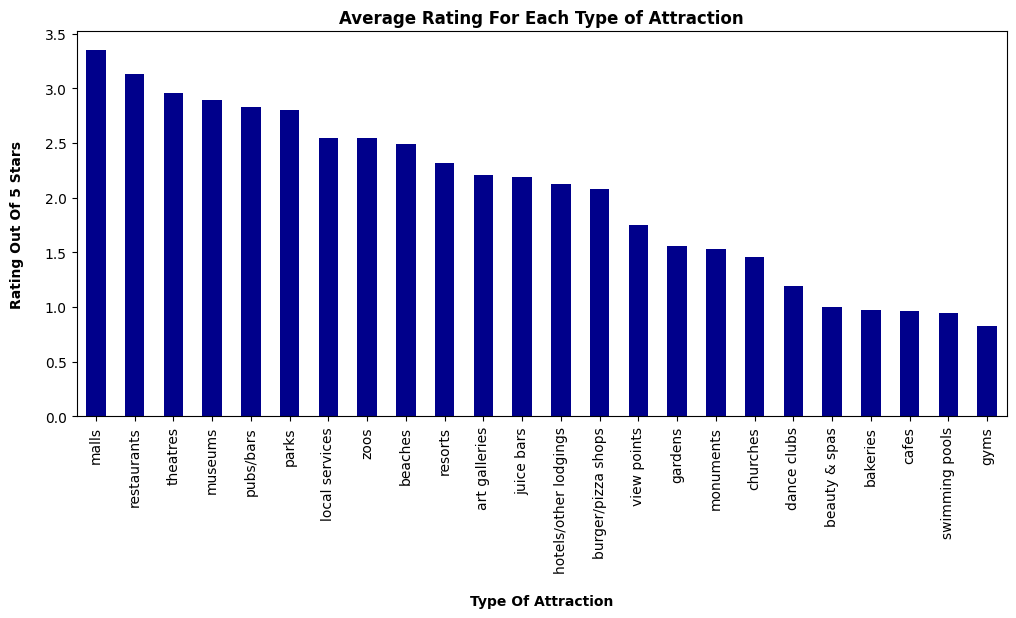

In [7]:
#Creating data frame of all feature averages
avg = data.mean().sort_values(ascending=False)
avg = pd.DataFrame(avg)

#Plotting averages in descending order
plot = avg.plot(kind='bar', figsize= (12,5), legend= False, color='darkblue')
plot.set_title('Average Rating For Each Type of Attraction',fontdict={'fontweight':'bold'})
plot.set_xlabel("Type Of Attraction",fontdict={'fontweight':'bold'}, labelpad=15)
plot.set_ylabel("Rating Out Of 5 Stars",fontdict={'fontweight':'bold'}, labelpad= 15)

plt.show()


Appears some of the higher rated attractions travelers went to were malls, restaurants, and theatres while cafes, swimming pools, and gyms were the worst rated. There could be numerous reasons why this is the case, one reason is places like theatres and restaurants are great way for people to experience the local culture and food(could argue the same thing for cafes though) while many people wouldn't really care about what the gyms are like and are probably less likely to be working out while on vacation. People on vacation might prefer to visit beaches than pools as well.

**Distribution Of Ratings for Each Attraction**

C:\Users\jlawr\AppData\Local\Temp\ipykernel_15068\4082214200.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  boxplot.set_xticklabels(labels=data.columns,rotation = 90)


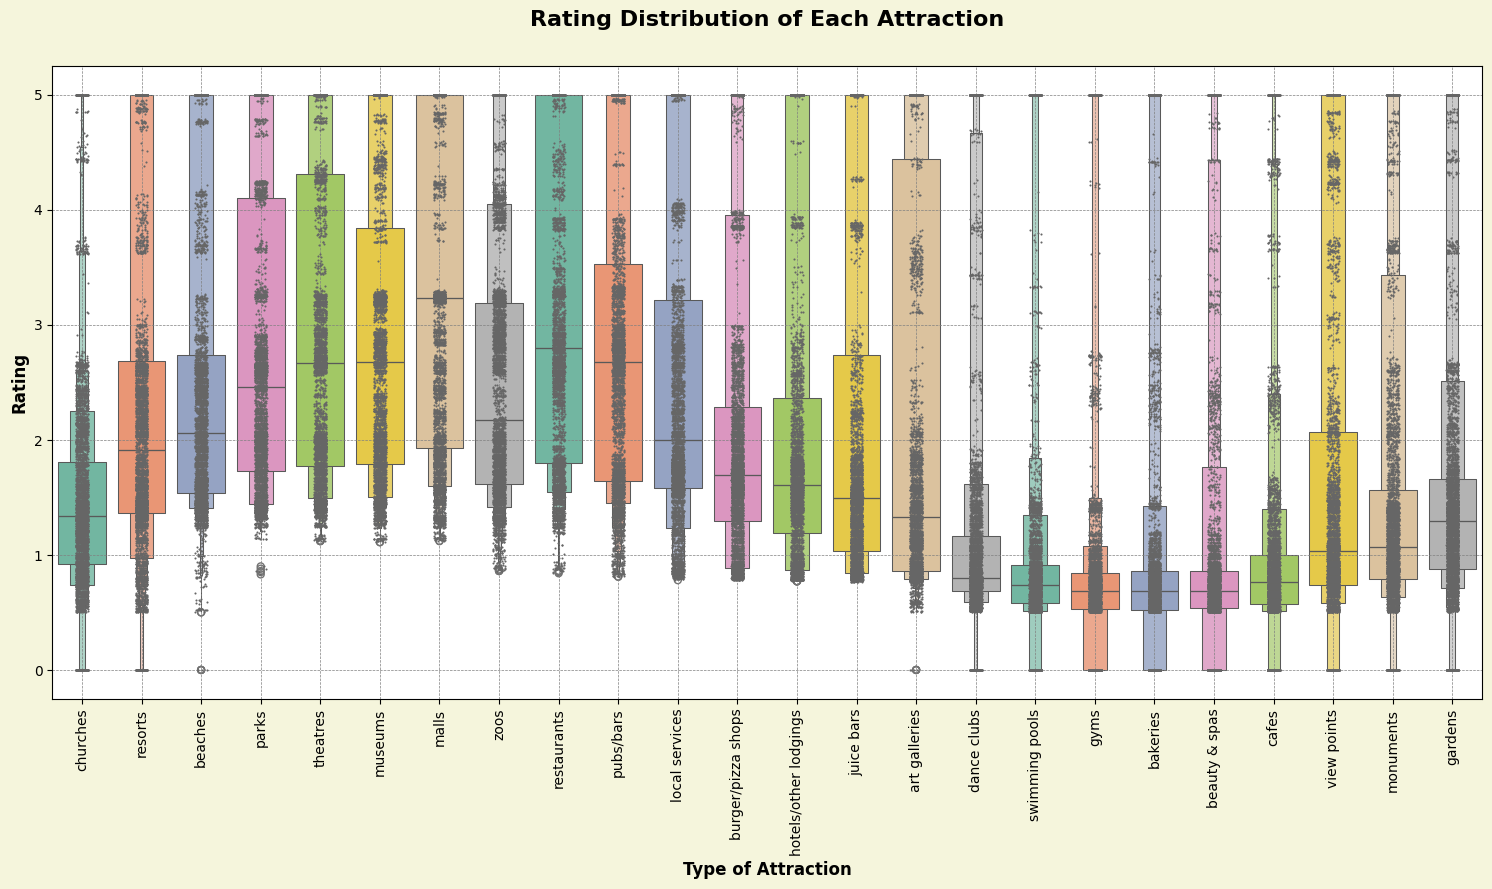

In [8]:
df_melt = pd.melt(data, value_vars=data.columns, var_name = 'feature', value_name='rating')#Creating data frame where each rating is in a row by itself for the box plot

#Creating boxplot
fig = plt.figure(figsize=(15,9), facecolor='#f5f5dc')
boxplot = sns.boxenplot(df_melt, x='feature', y='rating',hue = 'feature',palette='Set2')
sns.stripplot(df_melt, x = 'feature', y = 'rating', size = 1.5, color='.4')


plt.grid(color='gray', linestyle='--', linewidth=0.5)
boxplot.set_xticklabels(labels=data.columns,rotation = 90)
plt.xlabel("Type of Attraction", fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('Rating', fontdict={'fontweight':'bold', 'fontsize': 12})
plt.title('Rating Distribution of Each Attraction', fontdict={'fontweight':'bold', 'fontsize': 16}, y=1.05)
fig.tight_layout(pad=1)

plt.show()

Looks like the attractions with higher average ratings share similar distributions while the lower average ratings attractions share similar distributions as well.

**Looking at Possible Correlations Between Attractions**

<AxesSubplot: >

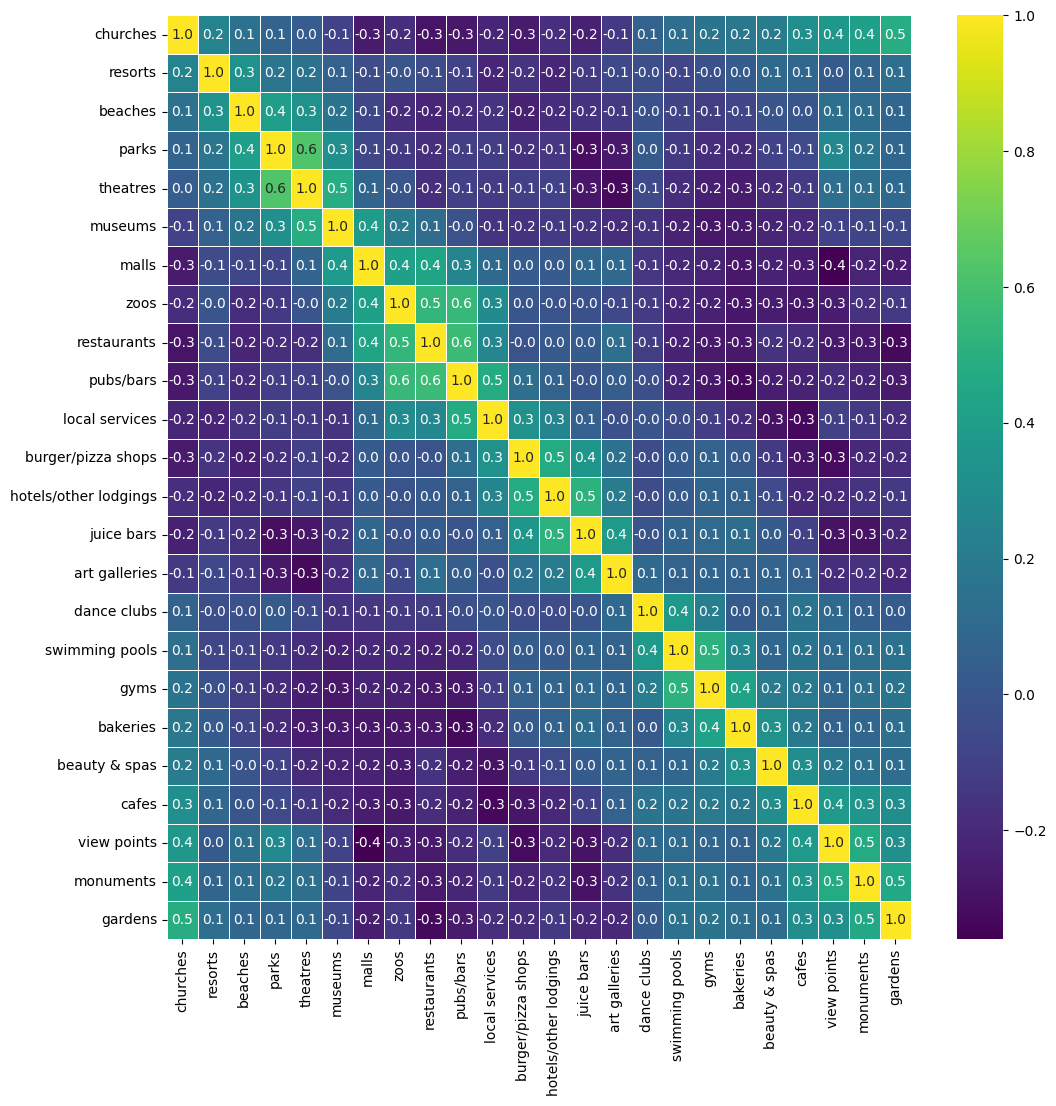

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True, fmt= '.1f', cmap = 'viridis', linewidths=.5)

Besides the diagonal which will always be 1, it seems the features in this dataset don't share strong correlations which may indicate there aren't many linear relationships between variables in this dataset. Even if the relationships between variables in this dataset aren't linear, for each model created in this notebook performed best by Principal Component Analysis(PCA) to reduce the dataset to 2 dimensions compared to using a higher dimension PCA model and the non-dimension reduced data, the tests aren't in this notebook but I fitted the models to each one of these variations of the dataset and kept the best performing one(which was the 2 component PCA dataset everytime).

# Cluster Model 1: K-Means Clustering Utilizing PCA

First model I will experiment with is one of the most common clustering algorithms (K-Means Clustering) which finds the optimal coordinates of for an arbitrary k-amount of centroids and labels data points as part of a cluster/centroid based on which centroid it's closest to. The centroids start at random points and continously update to the average coordinates of the points its assigned to until there are no more cluster changes for data points.

As shown in the boxplots for the features/attractions, there are variations in ratings distrbution for each attraction so it is probably smart to scale and standardize the data.

**Scaling The Data**

In [10]:
#Scaling Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

With there being 24 features in this dataset, that's a lot of dimensions to work with so the clustering models might work better if we perform some dimensionality reduction. This will lead to better computational efficiency as well.

**Utilzing PCA**

In [11]:
pca = PCA(n_components=.9) #We want explain variance to be at least 90% so that means we are still retaining most of the variance and information from the dataset 

pca_data = pca.fit_transform(scaled_data)
print('Number of components to reach .9 explained variance:',pca.n_components_)
print('Explain Variance with 18 Components:', sum(pca.explained_variance_ratio_))


Number of components to reach .9 explained variance: 18
Explain Variance with 18 Components: 0.9095041692424847


18 dimensions is still pretty big and obviously we can only visualize up to 3 dimensions with 2 being the easiest to interpret. Using the Elbow method, I'm going to test whether the non-PCA data, PCA data with 2 components, or PCA data with 18 components is best to perform clustering and using the elbow method we can figure out the optimal amount of clusters. Even if the 18 component PCA data is the best we could still visualize the data and clusters on the 2 best componenets but the visualization might not capture the clusters clearly.

**Using Elbow Method To Determine Amount of Clusters And If PCA or Non-PCA Is Better**

To find the optimal amount of clusters, I will plot the Within-Cluster Sum of Square(WCSS) for different cluster amounts and find the 'elbow' where the rate of change for WCSS starts to flatten. WCSS is the squared distance of all data points to their corresponding cluster centroid/center so a smaller WCSS indicates more compact clusters which is desirable.

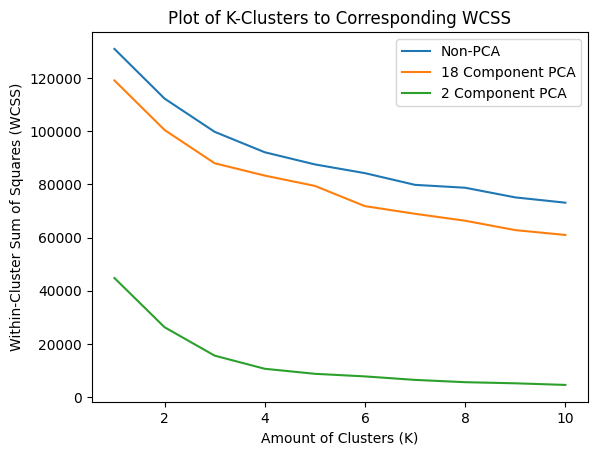

In [12]:
pca2 = PCA(n_components= 2)

pca_data2 = pca2.fit_transform(scaled_data)
#Calculating the WCSS/Inertia for different amounts of clusters
clusters = [i for i in range(1,11)]
wcss_nonpca = []
wcss_pca18 = []
wcss_pca2 = []
for i in clusters:
    kmeans = KMeans(n_clusters=i,random_state=100)#Added random state for reproducability
    kmeans.fit(scaled_data)#Fitting Kmeans model to non pca data
    wcss_nonpca.append(kmeans.inertia_)

    kmeans.fit(pca_data)#Fitting model to pca 18 components data
    wcss_pca18.append(kmeans.inertia_)

    kmeans.fit(pca_data2)#Fitting model to pca 2 components data
    wcss_pca2.append(kmeans.inertia_)

plt.plot(clusters,wcss_nonpca)
plt.plot(clusters,wcss_pca18)
plt.plot(clusters,wcss_pca2)
plt.legend(['Non-PCA','18 Component PCA', '2 Component PCA'])
plt.title('Plot of K-Clusters to Corresponding WCSS')
plt.xlabel('Amount of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

The 'elbow' of the chart appears to be at 3 or 4 clusters, when computing the silhouette scores, having 4 clusters performed better

Another metric we can look at to see which version of the dataset performed best is the silhouette score. Silhouette scores range from 1 to -1 with 1 being the best an -1 being the worst. The silhouette score measures how well a model clusters points based on how similar data points are to the points in its cluster compared to other clusters.

In [97]:
#Initialzing K-means model
kmeans = KMeans(n_clusters=4, random_state=100)

print('Non-PCA Silhouette Score:',silhouette_score(scaled_data, kmeans.fit(scaled_data).labels_))
print('18 Component PCA Silhouette Score:',silhouette_score(pca_data, kmeans.fit(pca_data).labels_))
print('2 Component PCA Silhouette Score', silhouette_score(pca_data2, kmeans.fit(pca_data2).labels_))

Non-PCA Silhouette Score: 0.14440205327723607
18 Component PCA Silhouette Score: 0.1623907020863482
2 Component PCA Silhouette ScoreL 0.4421612254410201


The Non-PCA and 18 component PCA scores performed poorly with scores near 0 indicating the model didn't make meaningful clusters. The 2 component PCA did moderately well with a score of .44 indicating it made clusters with decent significance, so we will move on with the model using the 2 component PCA dataset.

**Visualizing Clusters**

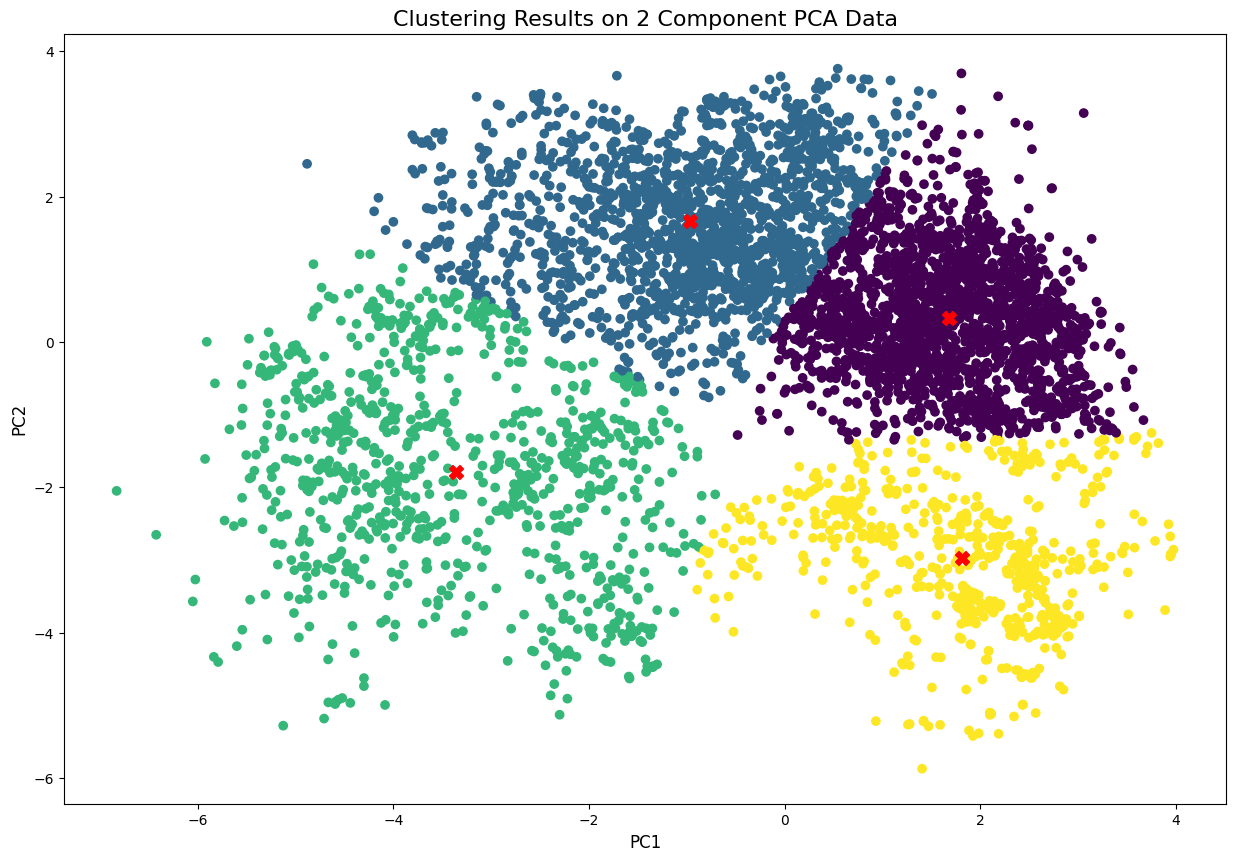

In [99]:
kmeans.fit(pca_data2)

cluster_labels = kmeans.labels_ #Storing cluster assignments

#Creating Scatterplot
plt.figure(figsize=(15,10))
plt.scatter(pca_data2[:,0],pca_data2[:,1],c = cluster_labels, cmap='viridis')

#Adding cluster centroids
plt.scatter(x=kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker='X', s=100, c = 'red')
plt.title('Clustering Results on 2 Component PCA Data', fontsize = 16)
plt.xlabel('PC1', fontsize = 12)
plt.ylabel('PC2', fontsize = 12)

plt.show()

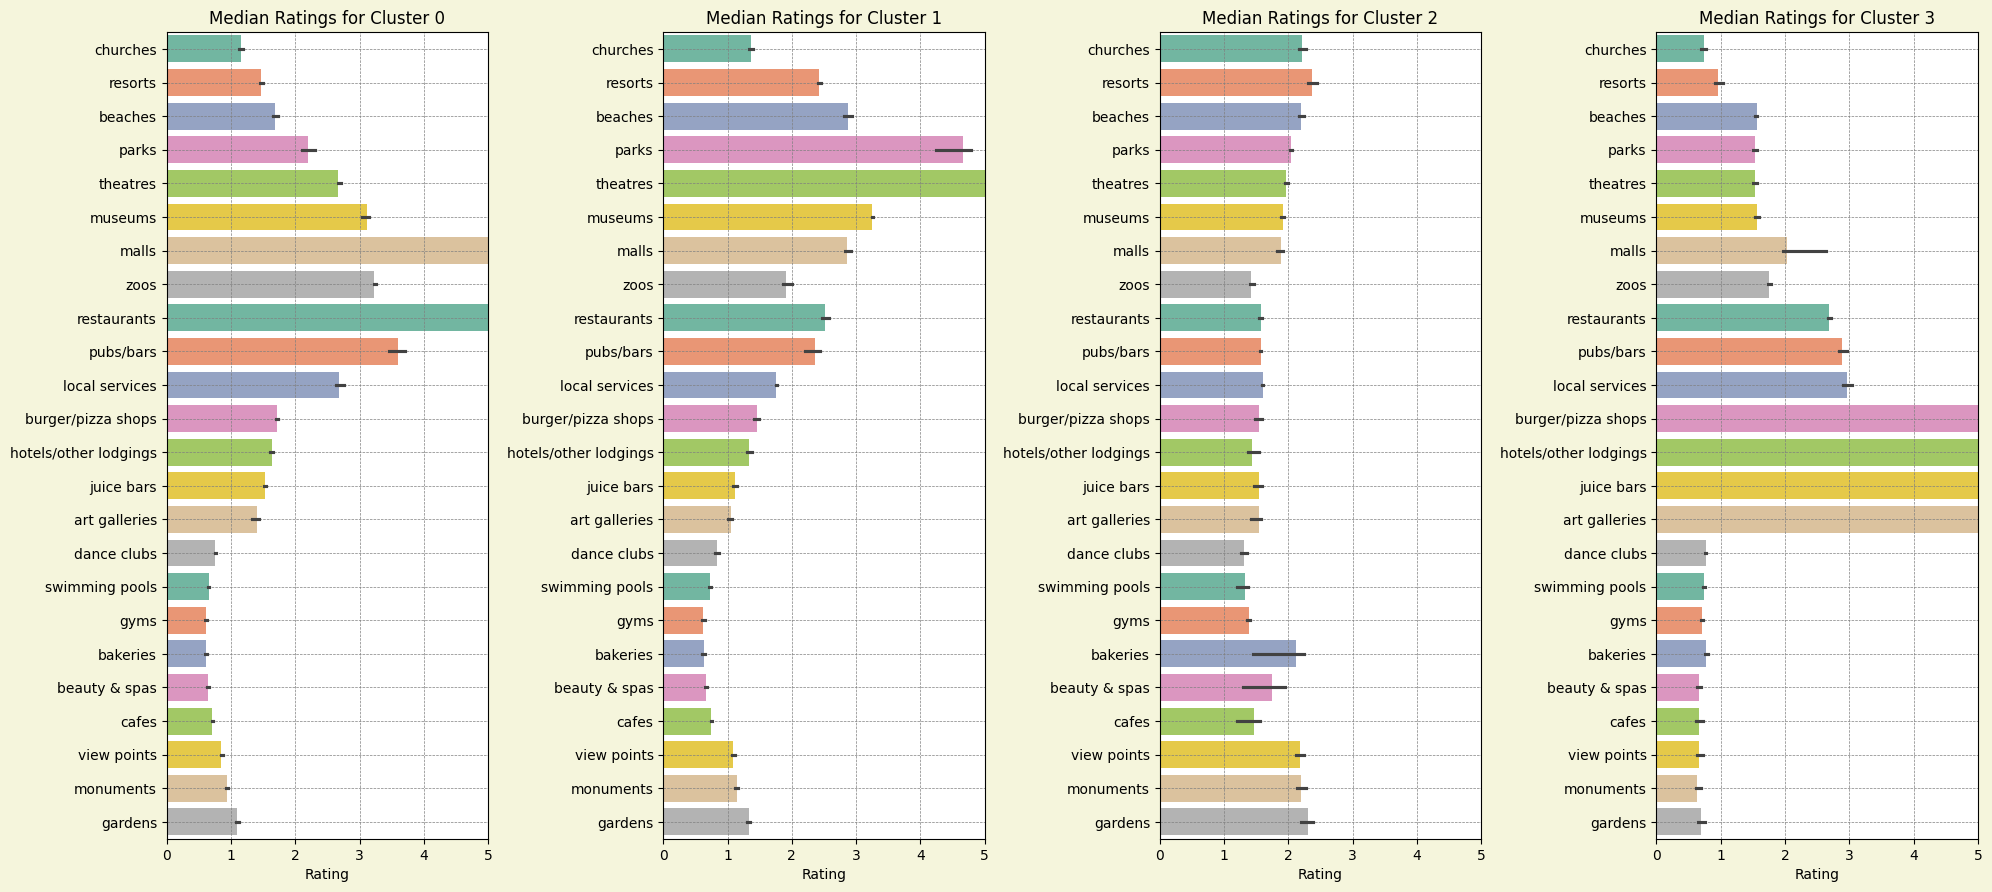

In [15]:
data['cluster'] = cluster_labels #Adding cluster labels to data frame

#Storing each cluster in their own dataframe
cluster0_df = data[data['cluster']==0]
cluster1_df = data[data['cluster']==1]
cluster2_df = data[data['cluster']==2]
cluster3_df = data[data['cluster']==3]

cluster_lst = [cluster0_df,cluster1_df,cluster2_df,cluster3_df]#Storing all the cluster dfs so they can be iterated through in the for loop

#Droping cluster column so they don't appear in bar graphs
for i in cluster_lst:
    i.drop('cluster', axis = 1)

#Creating Plots
fig, ax = plt.subplots(1,4,figsize=(20,9))
fig.set_facecolor('#f5f5dc')

for i in range(4):
    plt.subplot(1,4,i+1)#Identifying which subplot to edit
    melted = pd.melt(cluster_lst[i],value_vars=data.columns[:24], var_name = 'feature', value_name='Rating')
    sns.barplot(melted, y='feature', x='Rating',hue = 'feature',palette='Set2', estimator=np.median) #Creating barplot, using median displayed trends amongst groups better
    ax[i].set_xlim(0,5)
    ax[i].set_ylabel('')
    plt.title('Median Ratings for Cluster '+ str(i))
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
fig.tight_layout(pad=1)

plt.show()

**Takeaways From Cluster Groups**

- **Cluster 0:** Travellers in this cluster seem to enjoy going out and shopping at malls and going out to local restaurants and pubs/bars. They also appear to enjoy museums and other local services

- **Cluster 1:** These travellers appear to enjoy public services and areas including parks, theatres, museums, and beaches

- **Cluster 2:** It appears this group rates most attractions the same but lean towards sight seeing attractions like view points, monuments, and gardens.

- **Cluster 3:** Travellers in this group appear big into food spots and lean more towards fast food like burgers and pizza as well as juice bars compared to restaurants and pubs/bars. Interstingly this group is big into art galleries as well.

# Model 2: Spectral Clustering

Since there are many non-linear relationships in the dataset I wanted to test out a clustering method meant for non-linear data. It utilizes a similarity matrix(I tested out the rbf and nearest neighbors options) which is used to create a Laplacian matrix. It uses the first arbitray k-amount of eigenvectors to create a new feature space for the data points then uses k-means clustering to make groups based on the new feature space. So basically doing k-means clustering again but transforming the data it sees using a similarity matrix since the correlation matrix created earlier in this notebook indicate a lot of non-linear relationships.

**Finding Optimal Amount of Clusters Using Silhouette Score**

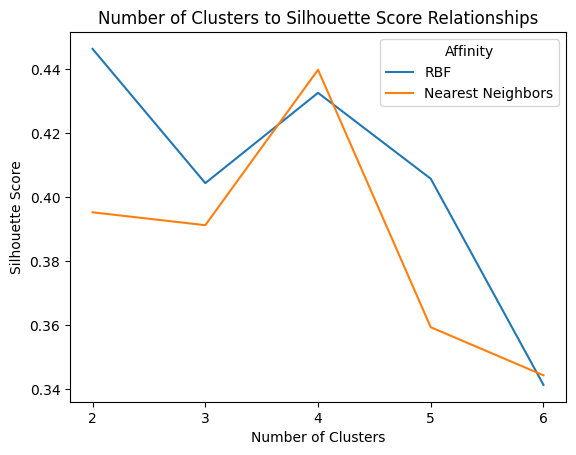

In [73]:
n_clusters = [i for i in range(2,7)]

rbf_silhouettes = []
nn_silhouettes = []
for i in n_clusters:
    rbf = SpectralClustering(n_clusters=i, affinity='rbf', random_state=100)#Experimenting and tuning the gamma parameter didn't make much of a difference so I'm keeping the default one
    rbf_clusters = rbf.fit_predict(pca_data2)
    rbf_silhouettes.append(silhouette_score(pca_data2,rbf_clusters))

    nn = SpectralClustering(n_clusters=i, affinity = 'nearest_neighbors', random_state=100)#Like the gamma parameter, the default value for n_neighbors for this model appears best
    nn_clusters = nn.fit_predict(pca_data2)
    nn_silhouettes.append(silhouette_score(pca_data2,nn_clusters))

plt.plot(n_clusters,rbf_silhouettes)
plt.plot(n_clusters, nn_silhouettes)
plt.legend(['RBF', 'Nearest Neighbors'], title = 'Affinity')
plt.title('Number of Clusters to Silhouette Score Relationships')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks([2,3,4,5,6])
plt.show()

In [75]:
spectral_rbf = SpectralClustering(n_clusters=4, affinity='rbf', random_state=100)
rbf_labels = spectral_rbf.fit_predict(pca_data2) #Computationally too intensive to not use PCA data

spectral_nn = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=100)
nn_labels = spectral_rbf.fit_predict(pca_data2) 

print('RBF Silhouette: ', silhouette_score(pca_data2,rbf_labels))
print('Nearest Neighbors Silhouette: ', silhouette_score(pca_data2,nn_labels))

RBF Silhouette:  0.43255161892808414
Nearest Neighbors Silhouette:  0.43255161892808414


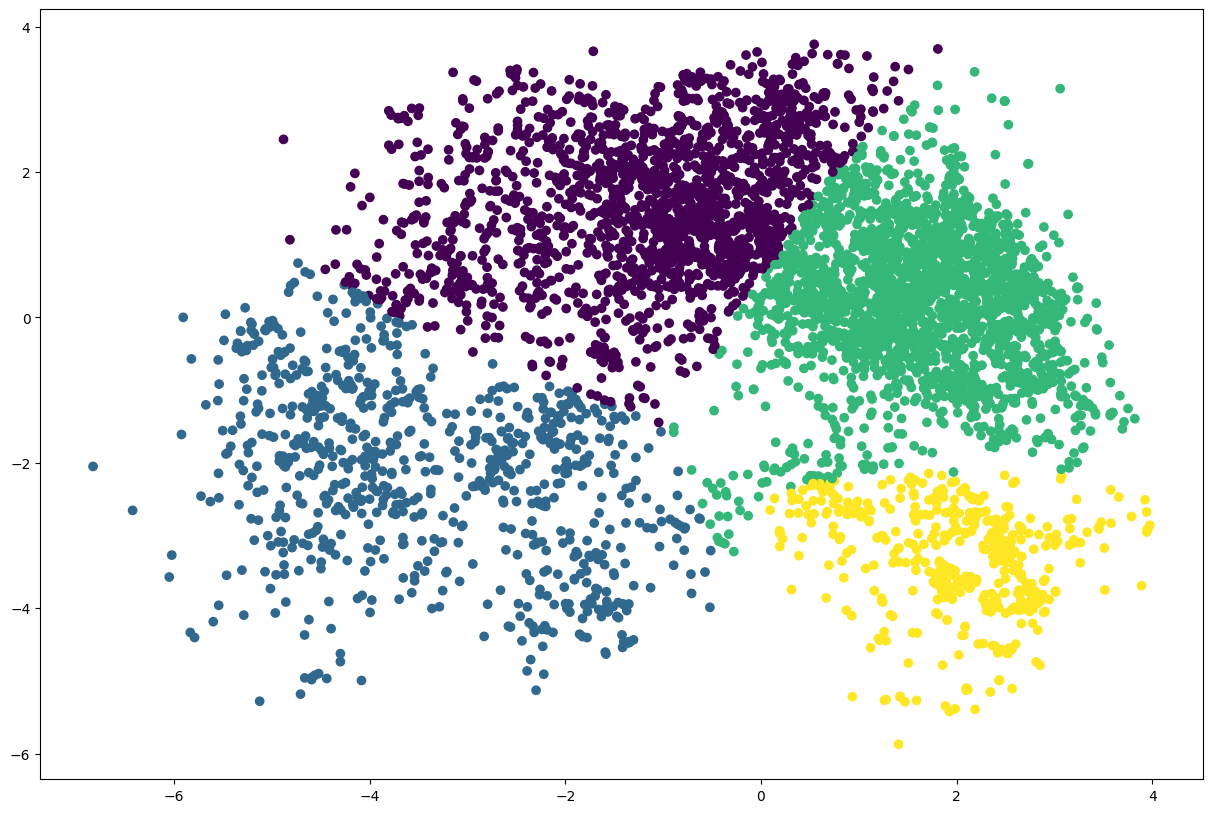

In [76]:
plt.figure(figsize=(15,10))
plt.scatter(pca_data2[:,0],pca_data2[:,1],c = nn_labels, cmap='viridis')

plt.show()

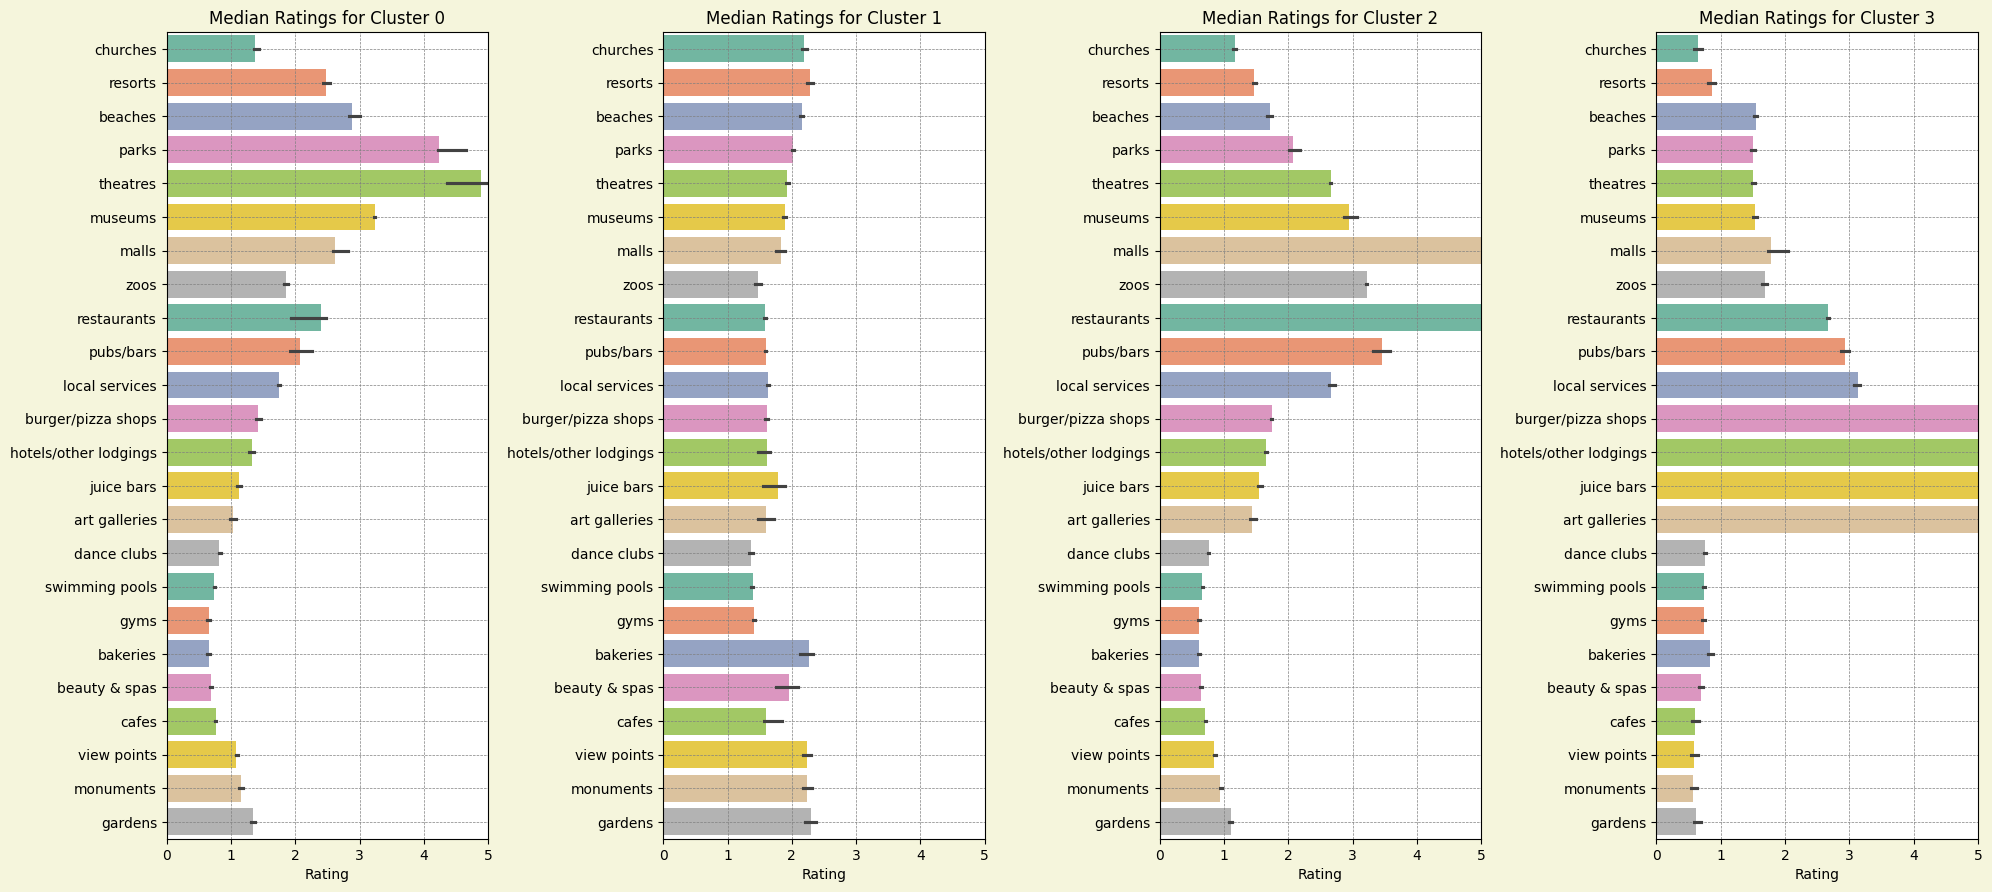

In [77]:
data['cluster'] = nn_labels #Adding nearest neighbor spectral clustering labels

#Storing each cluster in their own dataframe
speccluster0_df = data[data['cluster']==0]
speccluster1_df = data[data['cluster']==1]
speccluster2_df = data[data['cluster']==2]
speccluster3_df = data[data['cluster']==3]

speccluster_lst = [speccluster0_df,speccluster1_df,speccluster2_df,speccluster3_df]#Storing all the cluster dfs so they can be iterated through in the for loop

#Droping cluster column so they don't appear in bar graphs
for i in speccluster_lst:
    i.drop('cluster', axis = 1)

fig, ax = plt.subplots(1,4,figsize=(20,9))
fig.set_facecolor('#f5f5dc')

for i in range(4):
    plt.subplot(1,4,i+1)
    melted = pd.melt(speccluster_lst[i],value_vars=data.columns[:24], var_name = 'feature', value_name='Rating')
    sns.barplot(melted, y='feature', x='Rating',hue = 'feature',palette='Set2', estimator=np.median)
    ax[i].set_xlim(0,5)
    ax[i].set_ylabel('')
    plt.title('Median Ratings for Cluster '+ str(i))
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
fig.tight_layout(pad=1)

The results of the Spectral Clustering groups is very similar to those of the k-means with slight variations to the median ratings and confidence intervals for the true median ratings which is represented by the black lines in the bar plot. Also the corresponding clusters 0,1, and 2 for both models are labeled differently.

# Model 3: Hierarchical Clustering

Hierarchical clustering works by treating each point as its own cluster and merging clusters together based on a certain criteria and until a threshold is reached. The three I criteria methods I will look at is complete, average, and ward.
 
The complete criteria takes all the maximum distances between groups and merges the clusters with the smallest maximum distance.

The average method works by averaging all distances between points in grouped in different clusters and averages all the point distances, then you merge the 2 clusters of points with the smallest average distance. 

Ward takes all the changes in variance of different cluster groups after merging and saves the merged clusters which have the smallest increase in variance.

To find out the optimal amount of clusters for each hierarchical criteria and how the splitting is happening, I'll set up a dendrogram.

**Creating Dendrogram**

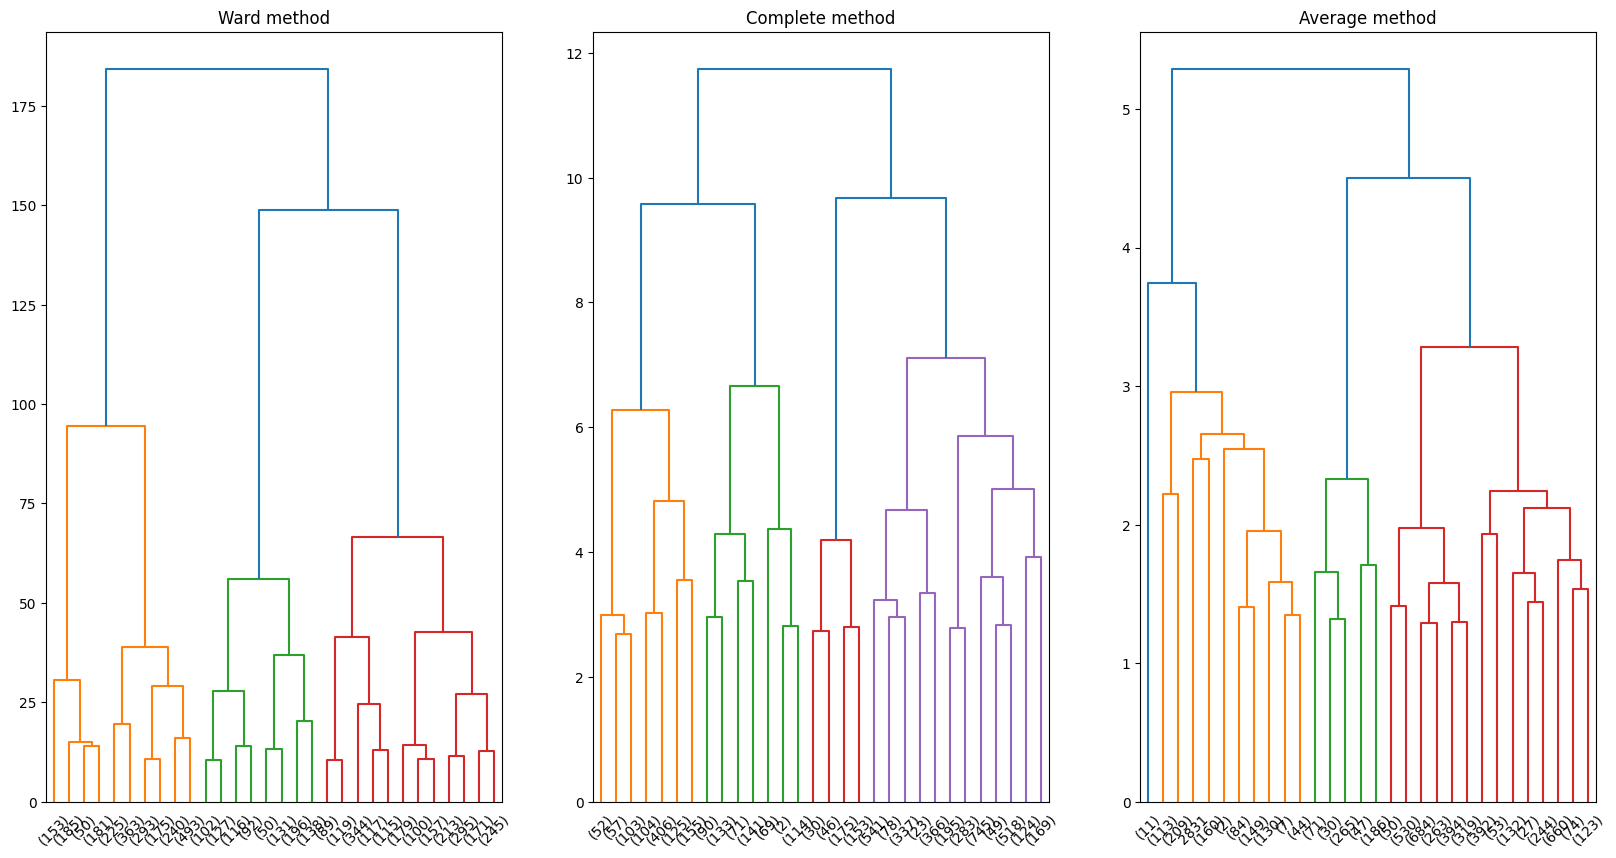

In [16]:
ax, fig = plt.subplots(1,3, figsize = (20,10))
methods = ['ward', 'complete','average'] #Testing different linkage methods

for i in range(3):
    plt.subplot(1,3,i+1)
    link = linkage(pca_data2,method=methods[i])
    dendrogram(link, truncate_mode='lastp')
    plt.title(methods[i].capitalize() + ' method')

plt.show()

In [34]:
print('Ward Silhouette: ', silhouette_score(pca_data2,AgglomerativeClustering(n_clusters= 3,linkage= 'ward').fit_predict(pca_data2)))
print('Complete Silhouette: ', silhouette_score(pca_data2,AgglomerativeClustering(n_clusters= 4,linkage= 'complete').fit_predict(pca_data2)))
print('Ward Silhouette: ', silhouette_score(pca_data2,AgglomerativeClustering(n_clusters= 4,linkage= 'average').fit_predict(pca_data2)))

Ward Silhouette:  0.40477313457431136
Complete Silhouette:  0.34544387987435055
Ward Silhouette:  0.36971433000092563


With the ward method having the most simple dendrogram and best silhouette score, it seems like this method should be the one used moving forward.

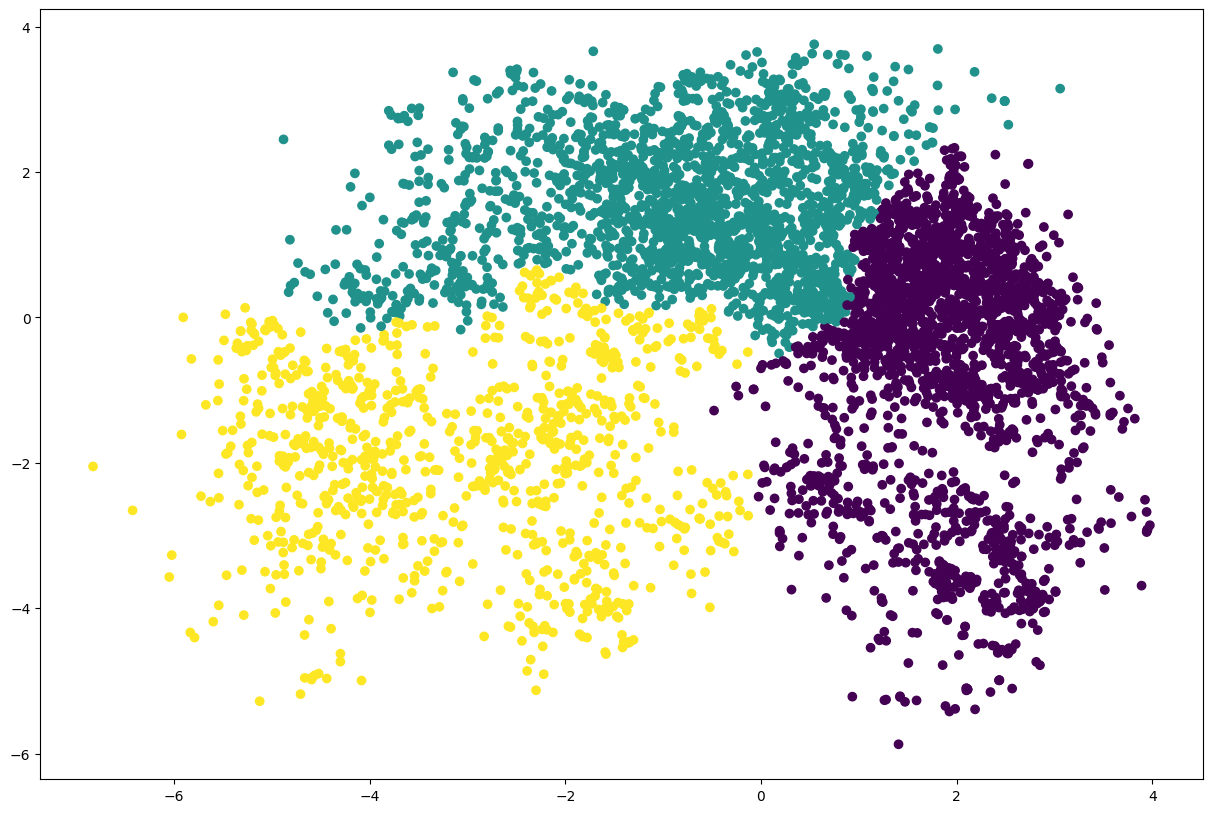

In [94]:
#Getting Clustering Labels
hierarchical_labels = AgglomerativeClustering(n_clusters= 3,linkage= 'ward').fit_predict(pca_data2) 

#Creating Scatterplot
plt.figure(figsize=(15,10))
plt.scatter(pca_data2[:,0],pca_data2[:,1],c = hierarchical_labels, cmap='viridis')

plt.show()

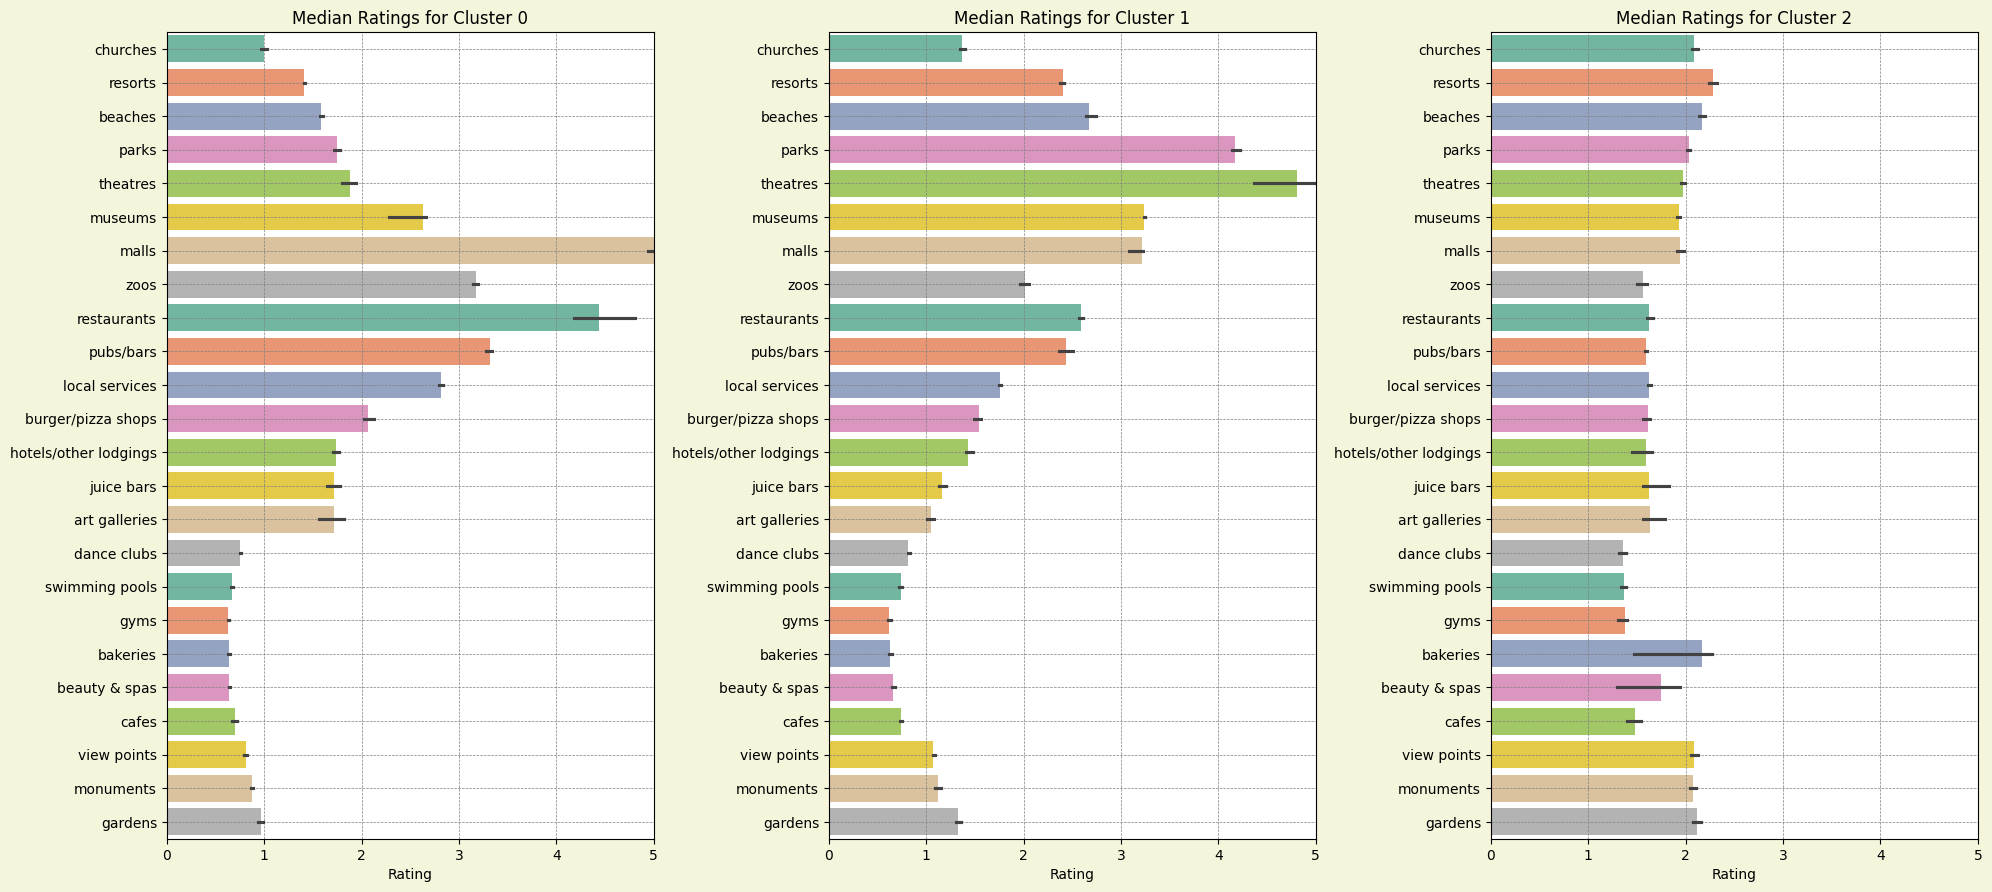

In [95]:
#Visualizing Cluster Groups
data['cluster'] = hierarchical_labels

hierarchy0 = data[data['cluster']==0]
hierarchy1 = data[data['cluster']==1]
hierarchy2 = data[data['cluster']==2]

hiearch_lst = [hierarchy0,hierarchy1,hierarchy2]

for i in hiearch_lst:
    i.drop('cluster', axis = 1)

#Creating Plots
fig, ax = plt.subplots(1,3,figsize=(20,9))
fig.set_facecolor('#f5f5dc')

for i in range(3):
    plt.subplot(1,3,i+1)
    melted = pd.melt(hiearch_lst[i],value_vars=data.columns[:24], var_name = 'feature', value_name='Rating')
    sns.barplot(melted, y='feature', x='Rating',hue = 'feature',palette='Set2', estimator=np.median) 
    ax[i].set_xlim(0,5)
    ax[i].set_ylabel('')
    plt.title('Median Ratings for Cluster '+ str(i))
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
fig.tight_layout(pad=1)

plt.show()

- **Cluster 0:** Looks very similar to cluster 0 and 2 of the k-means and spectral clustering models, where their favorite things to do while traveling is going shopping at malls and going out to restaurants and pubs/bars.

- **Cluster 1:** Some of the favorite things for travelers in this group to do is visit theatres, museums, malls, and parks.

- **Cluster 2:** Similar to the sight seeing groups for the k-means and spectral clustering models where most of the median ratings are the same with a slight preference to view parks, monuments, and gardens. 

# Evaluating/Comparing The Clustering Models

Besides using silhouette score I want use two other metrics to compare the different models:
- **Davies-Bouldin Index:** This score measures how well clusters are separated using intra-cluster distances(how compact the clusters are) and inter-cluster distance(how separated the clusters are from each other). Lower scores indicate a better clustering performance.

- **Calinski-Harabasz Index:** Also known as the Variance Ratio Criterion, its the ratio between the separation of clusters and compactness of the clusters, so how it determines which model clusters better is similar to the Davies-Bouldin Index, with this score higher scores mean better clustering.

In [86]:
metrics = {}
model_names = ['K-Means', 'Spectral', 'Hierarchical']
models = [cluster_labels,nn_labels,hierarchical_labels]
#Computing performance metrics for each model created
for i in range(3):
    stats = []
    stats.append(silhouette_score(pca_data2,models[i]))#Computing model silhouette score
    stats.append(davies_bouldin_score(pca_data2,models[i]))#Computing Davies-Bouldin Index Score
    stats.append(calinski_harabasz_score(pca_data2,models[i]))#Calinski-Harabasz Index Score

    metrics[model_names[i]] = stats #Storing all performance metrics for each model in a dictionary to make it easy to create a dataframe

metrics_df = pd.DataFrame(metrics,index=['Silhouette Score','Davies-Bouldin Index Score','Calinski-Harabasz Index Score'])
metrics_df

,K-Means,Spectral,Hierarchical
Silhouette Score,0.442161,0.432552,0.404773
Davies-Bouldin Index Score,0.732588,0.726090,0.831843
Calinski-Harabasz Index Score,5809.087987,5310.323624,4581.347953


The K-means model and spectral model have very similar silhouette and Davies-Bouldin scores with the hierarchical model lacking a lot in both. It seems the main differentiator is the Calinski-Harabasz score, so it appears the simple k-means clustering model performed the best.

**Takeaways/Conclusion**

Through the usage of k-means clustering we were able to find an effective way of segmentating travelers based on their interests. Given a new traveler added to the database, you could transform the new data point into the PCA feature space then run the data point through the k-means clustering model to label the new traveler in the appropriate group. 

This clustering model can be used as the basis for a travel recommendation system by a company like Google (company the data comes from) or a travel agency to give personalized and useful travel recommendations so travelers can have a more enjoyable experience researching activites to do while on vacation. 